# Stage 09 — Homework Starter Notebook

In the lecture, we learned how to create engineered features. Now it’s your turn to apply those ideas to your own project data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
%matplotlib inline
# !pip install pandas numpy matplotlib seaborn --- IGNORE ---  
sns.set(context='talk', style='whitegrid')
np.random.seed(8)
pd.set_option('display.max_columns', 100)

# Helper display
def title(msg):
    print('\n' + '='*len(msg))
    print(msg)
    print('='*len(msg))

# Example synthetic data (replace with your project dataset)
# np.random.seed(0)
# n = 100
# df = pd.DataFrame({
#     'income': np.random.normal(60000, 15000, n).astype(int),
#     'monthly_spend': np.random.normal(2000, 600, n).astype(int),
#     'credit_score': np.random.normal(680, 50, n).astype(int)
# })
# df.head()

n = 360 
df = pd.DataFrame({
    'dates': pd.date_range('2021-01-01', periods=n, freq='D'),
    'customer_id': range(1, n+1),
    'age': np.random.randint(18, 70, n),
    'income': np.random.normal(60000, 15000, n).astype(int),
    'account_balance': np.random.normal(15000, 5000, n).astype(int),
    'num_transactions': np.random.poisson(30, n),
    'account_type': np.random.choice(['savings', 'checking', 'credit'], n, p=[0.5, 0.4, 0.1]),
    'region': np.random.choice(['north', 'south', 'east', 'west'], n),
    'tenure_years': np.random.randint(1, 20, n),
    'churned': np.random.choice([0,1], n, p=[0.85,0.15]),
    'last_login_days_ago': np.random.randint(0, 60, n),
    'credit_score': np.random.normal(700, 50, n).astype(int),
    'default_flag': np.random.choice([0,1], n, p=[0.8,0.2])
})
df.head()  

,dates,customer_id,age,income,account_balance,num_transactions,account_type,region,tenure_years,churned,last_login_days_ago,credit_score,default_flag
0,2021-01-01,1,21,54184,16178,30,savings,north,1,0,28,659,1
1,2021-01-02,2,38,55133,14622,38,savings,east,3,0,7,629,1
2,2021-01-03,3,67,71818,13620,24,savings,south,7,0,45,761,0
3,2021-01-04,4,59,34782,10255,41,savings,west,3,0,13,737,0
4,2021-01-05,5,23,92185,17773,33,savings,north,18,0,34,640,0


## TODO: Implement at least 2 engineered features here

In [ ]:
#Implement 3 engineered features here
df['income_to_balance_ratio'] = df['income'] / (df['account_balance'] + 1)  # Avoid division by zero
 

,dates,customer_id,age,income,account_balance,num_transactions,account_type,region,tenure_years,churned,last_login_days_ago,credit_score,default_flag,income_to_balance_ratio,transactions_per_year,is_active
0,2021-01-01,1,21,54184,16178,30,savings,north,1,0,28,659,1,3.349033,180.000000,1
1,2021-01-02,2,38,55133,14622,38,savings,east,3,0,7,629,1,3.770293,114.000000,1
2,2021-01-03,3,67,71818,13620,24,savings,south,7,0,45,761,0,5.272594,36.000000,0
3,2021-01-04,4,59,34782,10255,41,savings,west,3,0,13,737,0,3.391381,123.000000,1
4,2021-01-05,5,23,92185,17773,33,savings,north,18,0,34,640,0,5.186508,20.842105,0


### Rationale for Feature 1
Explain why this feature may help a model. Reference your EDA.

income_to_balance_ratio`
- **Why it helps**: Combines `income` and `account_balance` into a ratio, showing how much balance a customer maintains relative to income.  
- **EDA**:  
  - Identifies whether high earners maintain proportionally higher balances or spend most of their income.  
  - Highlights customers with unusually low balances despite high income (potentially at-risk or high spenders).  
  - Useful in scatter plots or clustering to separate “financially stable” vs. “at-risk” groups.  


In [ ]:
df['transactions_per_year'] = df['num_transactions'] * 12 / (df['tenure_years'] + 1)  # Avoid division by zero

### Rationale for Feature 2
transactions_per_year`
- **Why it helps**: Normalizes `num_transactions` by tenure, making activity comparable across new and long-time customers.  
- **EDA value**:  
  - Allows fair comparison of transaction intensity regardless of account age.  
  - Detects outliers (e.g., very high rates) → may indicate heavy users, fraud, or strong engagement.  
  - Often correlates more strongly with churn or revenue than raw transaction counts.  


In [ ]:
df['is_active'] = (df['last_login_days_ago'] <= 30).astype(int) # Active if logged in within last 30 days df.head()

### Rationale for Feature 3
`is_active`
- **Why it helps**: Converts `last_login_days_ago` into a binary flag (active within 30 days or not).  
- **EDA value**:  
  - Simplifies customer segmentation into active vs. inactive groups.  
  - Enables quick comparisons of balances, transactions, and income across activity status.  
  - Reveals behavioral drift over time (inactive customers may cluster with lower balances or fewer transactions).   


## 3) Plot or test correlation with target variable.

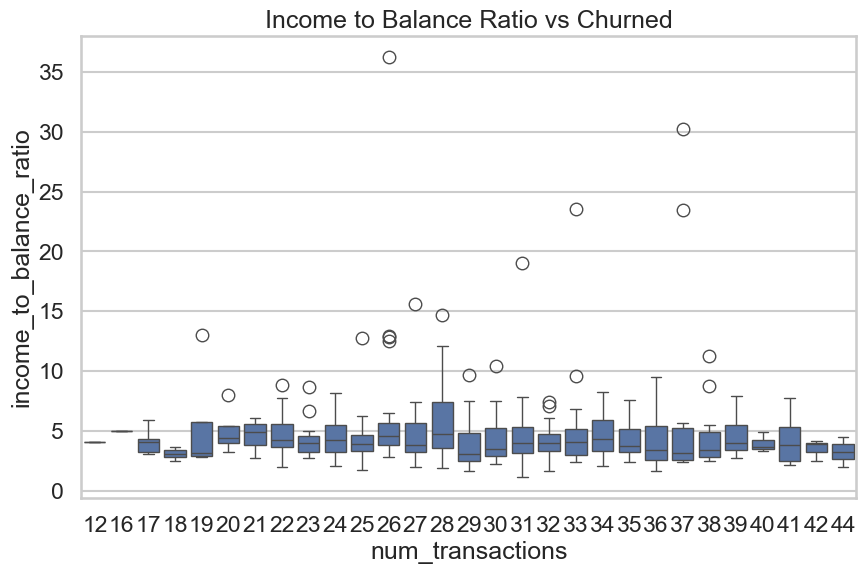

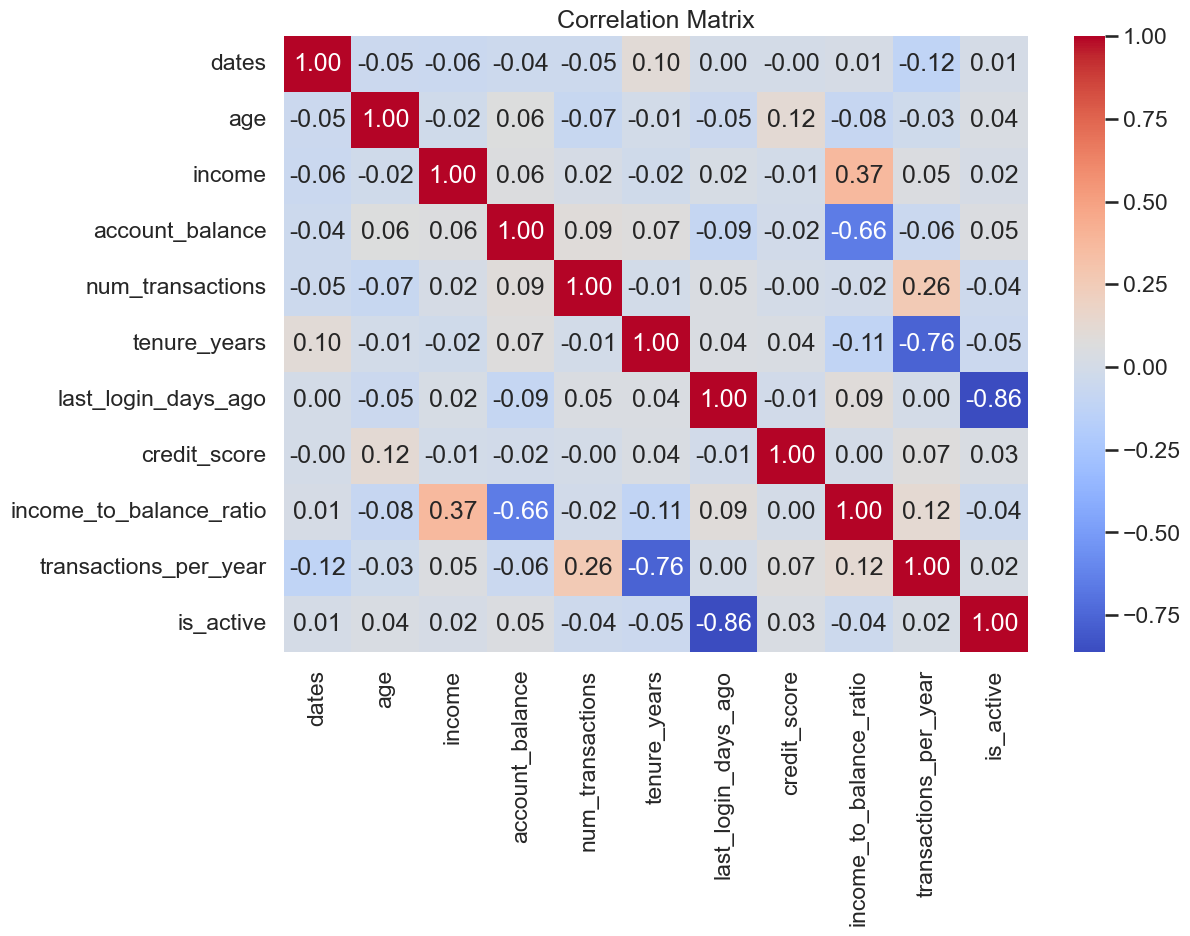

num_transactions           1.000000
transactions_per_year      0.258347
account_balance            0.085732
last_login_days_ago        0.046682
income                     0.016022
credit_score              -0.000794
tenure_years              -0.005742
income_to_balance_ratio   -0.016694
is_active                 -0.037357
dates                     -0.046151
age                       -0.071087
Name: num_transactions, dtype: float64


In [6]:
#Plot with target variable `num_transactions`
plt.figure(figsize=(10,6))
sns.boxplot(x='num_transactions', y='income_to_balance_ratio', data=df)
plt.title('Income to Balance Ratio vs Churned')
plt.show()

#correlation and correlation matrix with target variable `churned`
corr = df.drop(columns=['customer_id', 'account_type', 'region', 'churned', 'default_flag']).corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
# 3) Plot or test correlation with target variable.
print(corr['num_transactions'].sort_values(ascending=False))
